| Column                  | Description                                                           |
|-------------------------|----------------------------------------------------------------------|
| warehouse               | Identifier for the warehouse.                                         |
| date                    | Date of the recorded data.                                            |
| orders                  | Number of orders processed.                                           |
| holiday_name            | Name of the holiday (if applicable).                                  |
| holiday                 | Boolean indicating if it's a holiday.                                 |
| shutdown                | Boolean indicating if there's a general shutdown.                     |
| mini_shutdown           | Boolean indicating a partial shutdown.                                |
| shops_closed            | Boolean indicating if shops are closed.                               |
| winter_school_holidays  | Boolean indicating winter school holidays.                            |
| school_holidays         | Boolean indicating general school holidays.                           |
| blackout                | Boolean indicating if there's a blackout.                             |
| mov_change              | Indicator for changes in the movement or operations.                  |
| frankfurt_shutdown      | Specific shutdown related to Frankfurt operations.                    |
| precipitation           | Amount of precipitation recorded.                                     |
| snow                    | Boolean indicating if there's snowfall.                               |
| user_activity_1         | Additional user activity metric or identifier.                        |
| user_activity_2         | Additional user activity metric or identifier.                        |
| id                      | Unique identifier for each record.                                    |


1. `MAPE`
2. r2_score
* For this I used the MAPE and r2_score for Evaluation.

* In this Notebook, Firstly took the overview of the dataset in order to take the deep insights about the dataset
* This is the Rohlik Order Forecasting Challenge and it consists of Train data, test data and solution example
* Firstly in order to explore the Dataset the overview of data is taken.
* Then in order to take insights about the Dataset diffrent types of subplots are being plotted and took deep insights about the Dataset.
* Then apply Diffrent ML models such as CatBoost, XGBoost and LightGBM with Hyperparameter Tuning and select the Best Model out of it.
* The Best Model is the Cat Boost which Gives 0.035 MAPE and 0.98 r2_score.
* * Let's grow, collaborate, learn, innovate together!

In [1]:
%pwd

'D:\\教學\\備份\\2019_AI\\sklearn\\2019_Machine\\Data Minning\\TimeSeries\\新增資料夾\\rohlik-orders-forecasting-challenge-20240721T014927Z-001\\rohlik-orders-forecasting-challenge'

In [2]:
%cd "./content"

D:\教學\備份\2019_AI\sklearn\2019_Machine\Data Minning\TimeSeries\新增資料夾\rohlik-orders-forecasting-challenge-20240721T014927Z-001\rohlik-orders-forecasting-challenge\content


In [3]:
ls

 磁碟區 D 中的磁碟是 DATA
 磁碟區序號:  C828-6D94

 D:\教學\備份\2019_AI\sklearn\2019_Machine\Data Minning\TimeSeries\新增資料夾\rohlik-orders-forecasting-challenge-20240721T014927Z-001\rohlik-orders-forecasting-challenge\content 的目錄

2024/07/23  上午 10:43    <DIR>          .
2024/07/23  上午 10:43    <DIR>          ..
2024/07/23  下午 05:20            15,668 best_model_sample_sol.csv
2024/07/21  下午 01:58            15,655 best_model_sample_sol_v2.csv
2024/07/23  下午 05:20            15,666 best_model_sample_sol_v3.csv
2024/07/23  上午 10:42    <DIR>          catboost_info
2024/06/09  上午 06:03            10,071 solution_example.csv
2024/06/09  上午 06:03            20,053 test.csv
2024/06/09  上午 06:03            56,314 test_calendar.csv
2024/07/23  下午 05:20            39,613 test_df_selected.csv
2024/06/09  上午 06:03           673,371 train.csv
2024/06/09  上午 06:03           684,353 train_calendar.csv
2024/07/21  下午 04:04               289 新文字文件.txt
              10 個檔案       1,531,053 位元組
               3 個目錄  135,83

In [4]:
local_run=True


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')
#!cd '/content/drive/MyDrive/kaggle/rohlik-orders-forecasting-challenge/content'

In [6]:
ls

 磁碟區 D 中的磁碟是 DATA
 磁碟區序號:  C828-6D94

 D:\教學\備份\2019_AI\sklearn\2019_Machine\Data Minning\TimeSeries\新增資料夾\rohlik-orders-forecasting-challenge-20240721T014927Z-001\rohlik-orders-forecasting-challenge\content 的目錄

2024/07/23  上午 10:43    <DIR>          .
2024/07/23  上午 10:43    <DIR>          ..
2024/07/23  下午 05:20            15,668 best_model_sample_sol.csv
2024/07/21  下午 01:58            15,655 best_model_sample_sol_v2.csv
2024/07/23  下午 05:20            15,666 best_model_sample_sol_v3.csv
2024/07/23  上午 10:42    <DIR>          catboost_info
2024/06/09  上午 06:03            10,071 solution_example.csv
2024/06/09  上午 06:03            20,053 test.csv
2024/06/09  上午 06:03            56,314 test_calendar.csv
2024/07/23  下午 05:20            39,613 test_df_selected.csv
2024/06/09  上午 06:03           673,371 train.csv
2024/06/09  上午 06:03           684,353 train_calendar.csv
2024/07/21  下午 04:04               289 新文字文件.txt
              10 個檔案       1,531,053 位元組
               3 個目錄  135,83

In [7]:
#!pip install catboost
#!pip install scikit-optimize

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error
#from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
#from lightgbm import LGBMRegressor
from scipy.optimize import minimize
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from IPython.display import display, HTML
import io
import random

In [9]:
def load_and_describe_datasets(train_path, test_path, sub_path):
    # Load datasets
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    df_sub = pd.read_csv(sub_path)

    # Function to generate random shades of color
    def generate_random_color():
        color = "#{:02x}{:02x}{:02x}".format(
            random.randint(150, 255),
            random.randint(150, 255),
            random.randint(150, 255)
        )
        return color

    # Function to describe and generate HTML for a dataframe
    def describe_dataframe(df, name):
        html_output = []

        # Random colors for headings
        heading_colors = [generate_random_color() for _ in range(7)]  # Increased for additional section

        # Container for the entire section
        html_output.append(f"<div style='margin-top: 20px; margin-bottom: 20px; border: 2px solid #666; padding: 15px;'>")

        # Header for data overview
        html_output.append(f"<h2 style='background-color: {heading_colors[0]}; padding: 10px; border: 1px solid #ddd; color: #333; font-size: 24px;'>{name} Data Overview</h2>")

        # First 5 Rows
        html_output.append(f"<h3 style='background-color: {heading_colors[1]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>First 5 Rows</h3>")
        html_output.append("<div style='overflow-x: auto;'>")  # Ensure horizontal scrolling if needed
        html_output.append(df.head().to_html(classes='styled-table', index=False, max_rows=None))  # Display all rows
        html_output.append("</div>")
        html_output.append("\n")

        # Data Info
        html_output.append(f"<h3 style='background-color: {heading_colors[2]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>Data Info</h3>")
        buffer = io.StringIO()
        df.info(buf=buffer)
        info_str = buffer.getvalue()
        html_output.append(f"<pre>{info_str}</pre>")
        html_output.append("\n")

        # Summary Statistics
        html_output.append(f"<h3 style='background-color: {heading_colors[3]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>Summary Statistics</h3>")
        html_output.append("<div style='overflow-x: auto;'>")  # Ensure horizontal scrolling if needed
        html_output.append(df.describe().to_html(classes='styled-table', max_rows=None))  # Display all rows
        html_output.append("</div>")
        html_output.append("\n")

        # Data Structure
        html_output.append(f"<h3 style='background-color: {heading_colors[4]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>Data Structure</h3>")
        html_output.append(f"<p style='font-size: 16px;'>Rows: {df.shape[0]}, Columns: {df.shape[1]}</p>")
        html_output.append("\n")

        # Missing Values
        html_output.append(f"<h3 style='background-color: {heading_colors[5]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>Missing Values</h3>")
        html_output.append("<div style='overflow-x: auto;'>")  # Ensure horizontal scrolling if needed
        html_output.append(df.isnull().sum().to_frame(name='Missing Values').T.to_html(classes='styled-table', index=False))
        html_output.append("</div>")
        html_output.append("\n")

        # Data Types
        html_output.append(f"<h3 style='background-color: {generate_random_color()}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px; max-width: 800px;'>Data Types</h3>")
        html_output.append("<div style='overflow-x: auto; max-width: 800px;'>")  # Limit width for data types table
        html_output.append(df.dtypes.to_frame(name='Data Types').T.to_html(classes='styled-table', index=False))
        html_output.append("</div>")
        html_output.append("\n")

        # Column Names
        html_output.append(f"<h3 style='background-color: {heading_colors[6]}; padding: 8px; border: 1px solid #ddd; color: #333; font-size: 20px;'>Column Names</h3>")
        html_output.append("<div style='overflow-x: auto;'>")  # Ensure horizontal scrolling if needed
        html_output.append("<ul>")
        for col in df.columns:
            html_output.append(f"<li>{col}</li>")
        html_output.append("</ul>")
        html_output.append("</div>")
        html_output.append("\n")

        html_output.append("</div>")  # Close container for the entire section

        return "\n".join(html_output)

    # Describe each dataframe
    train_desc = describe_dataframe(df_train, "Train")
    test_desc = describe_dataframe(df_test, "Test")
    sub_desc = describe_dataframe(df_sub, "Submission Example")

    return train_desc, test_desc, sub_desc

# Example usage:
if local_run == True:
    train_path = "train.csv"
    test_path = "test.csv"
    sub_path = "solution_example.csv"
else:
    train_path = "train.csv"
    test_path = "test.csv"
    sub_path = "solution_example.csv"

train_desc, test_desc, sol_desc = load_and_describe_datasets(train_path, test_path, sub_path)

# Display the HTML outputs
display(HTML(train_desc))
display(HTML(test_desc))
display(HTML(sol_desc))

id,orders
Prague_1_2024-03-16,5000
Prague_1_2024-03-17,5000
Prague_1_2024-03-18,5000
Prague_1_2024-03-19,5000
Prague_1_2024-03-20,5000
,orders
count,397.0
mean,5000.0
std,0.0
min,5000.0


## Lets Have Sneakpeak at kde Plot


* This Python code  is used to create a function plot_kde_float_columns that generates KDE (Kernel Density Estimate) plots for the float columns.
* This function is used to generate efficiently KDE plots for the float columns which are specified and it provides the insights about the distribution and density of numerical data.
* For this Firstly set the background color and the whitegridstyle for the plots
* Then select the float columns from the data and create a list
* `num_plots = len(float_columns)` is used to determine the number of plots to create based on the number of float columns.
* Then specifies the number of rows and columns to create the subplot layout
* Then Flattens the 2D array of subplots into a 1D array so the iteration becomes easier.
* Then defines the color for kde Plot
* Then by `plt.tight_layout()` Adjusts subplot parameters to give specified padding.
* Finally Displays the final plot.



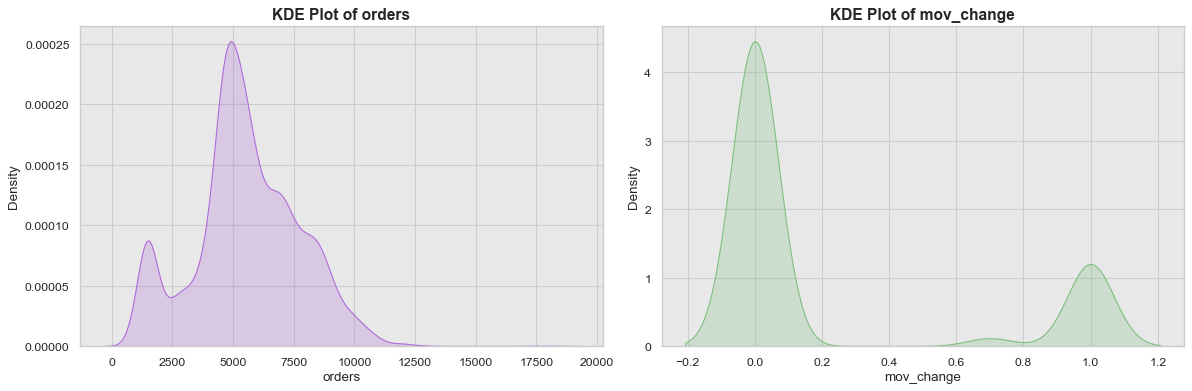

In [10]:
def plot_kde_float_columns(df):
    background_color = '#e8e8e8'
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

    float_columns = ['orders', 'mov_change']  # Specify float columns to plot

    num_plots = len(float_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=80)
    axs = axs.flatten()

    colors = ['#af6bd9', '#7fbf7f']  # Light purple and light green colors

    for i, col in enumerate(float_columns):
        sns.kdeplot(df[col], ax=axs[i], color=colors[i], fill=True)
        axs[i].set_title(f'KDE Plot of {col}', fontsize=14, weight='bold')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Density')

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the Rohlik Orders Forecasting Challenge data
# Replace 'df' with your actual DataFrame variable name in the function call
if local_run == True:
    df=pd.read_csv("train.csv")
else:
    df=pd.read_csv("/kaggle/input/rohlik-orders-forecasting-challenge/train.csv")

plot_kde_float_columns(df)


## Lets Display the Count Plot


* The function plot_bar_with_counts(df) is designed to create a grid of bar plots.
* This function efficiently creates multiple bar plots in a grid layout and is particularly useful for exploring and comparing categorical data distributions.
* Firstly the background color sets and then configure and set the white grid style
* Then the List of columns are defined that use to create individual bar plots and the columns list which is created includes the categorical columns so the barplots with their counts are plotted
* Then determine the number of plots which is plotted based on the number of columns specified
* Then Determines the number of rows required for the subplot grid layout
* The `for i, col in enumerate(bar_columns)` is used to iterate through each column to create the bar plot.
*  Its then create  a count plot by counting the occurrences of each category in the column and plots them as bars.
* Then `Set2` pelette is defined for the bars
* Then set the title , x-axis and y-axis labels
* `for container in p.containers` is used to iterate through each bar container in the plot p.
and `p.bar_label` then adds the labels inside each bar (container) and display the count plot.
* Then various parameters  such as label_type, color, fontsize  are set to customize the appearance of the labels.
* Then adjust the subplot layout and displays the plot.

<ipython-input-11-85340f1c3a47>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(y=col, data=df, palette='Set2', edgecolor='white', linewidth=2, ax=axs[i], order=df[col].value_counts().index)
<ipython-input-11-85340f1c3a47>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(y=col, data=df, palette='Set2', edgecolor='white', linewidth=2, ax=axs[i], order=df[col].value_counts().index)
<ipython-input-11-85340f1c3a47>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(y=col, data=df, palette='Set2', edgecolor='white', linewidth=

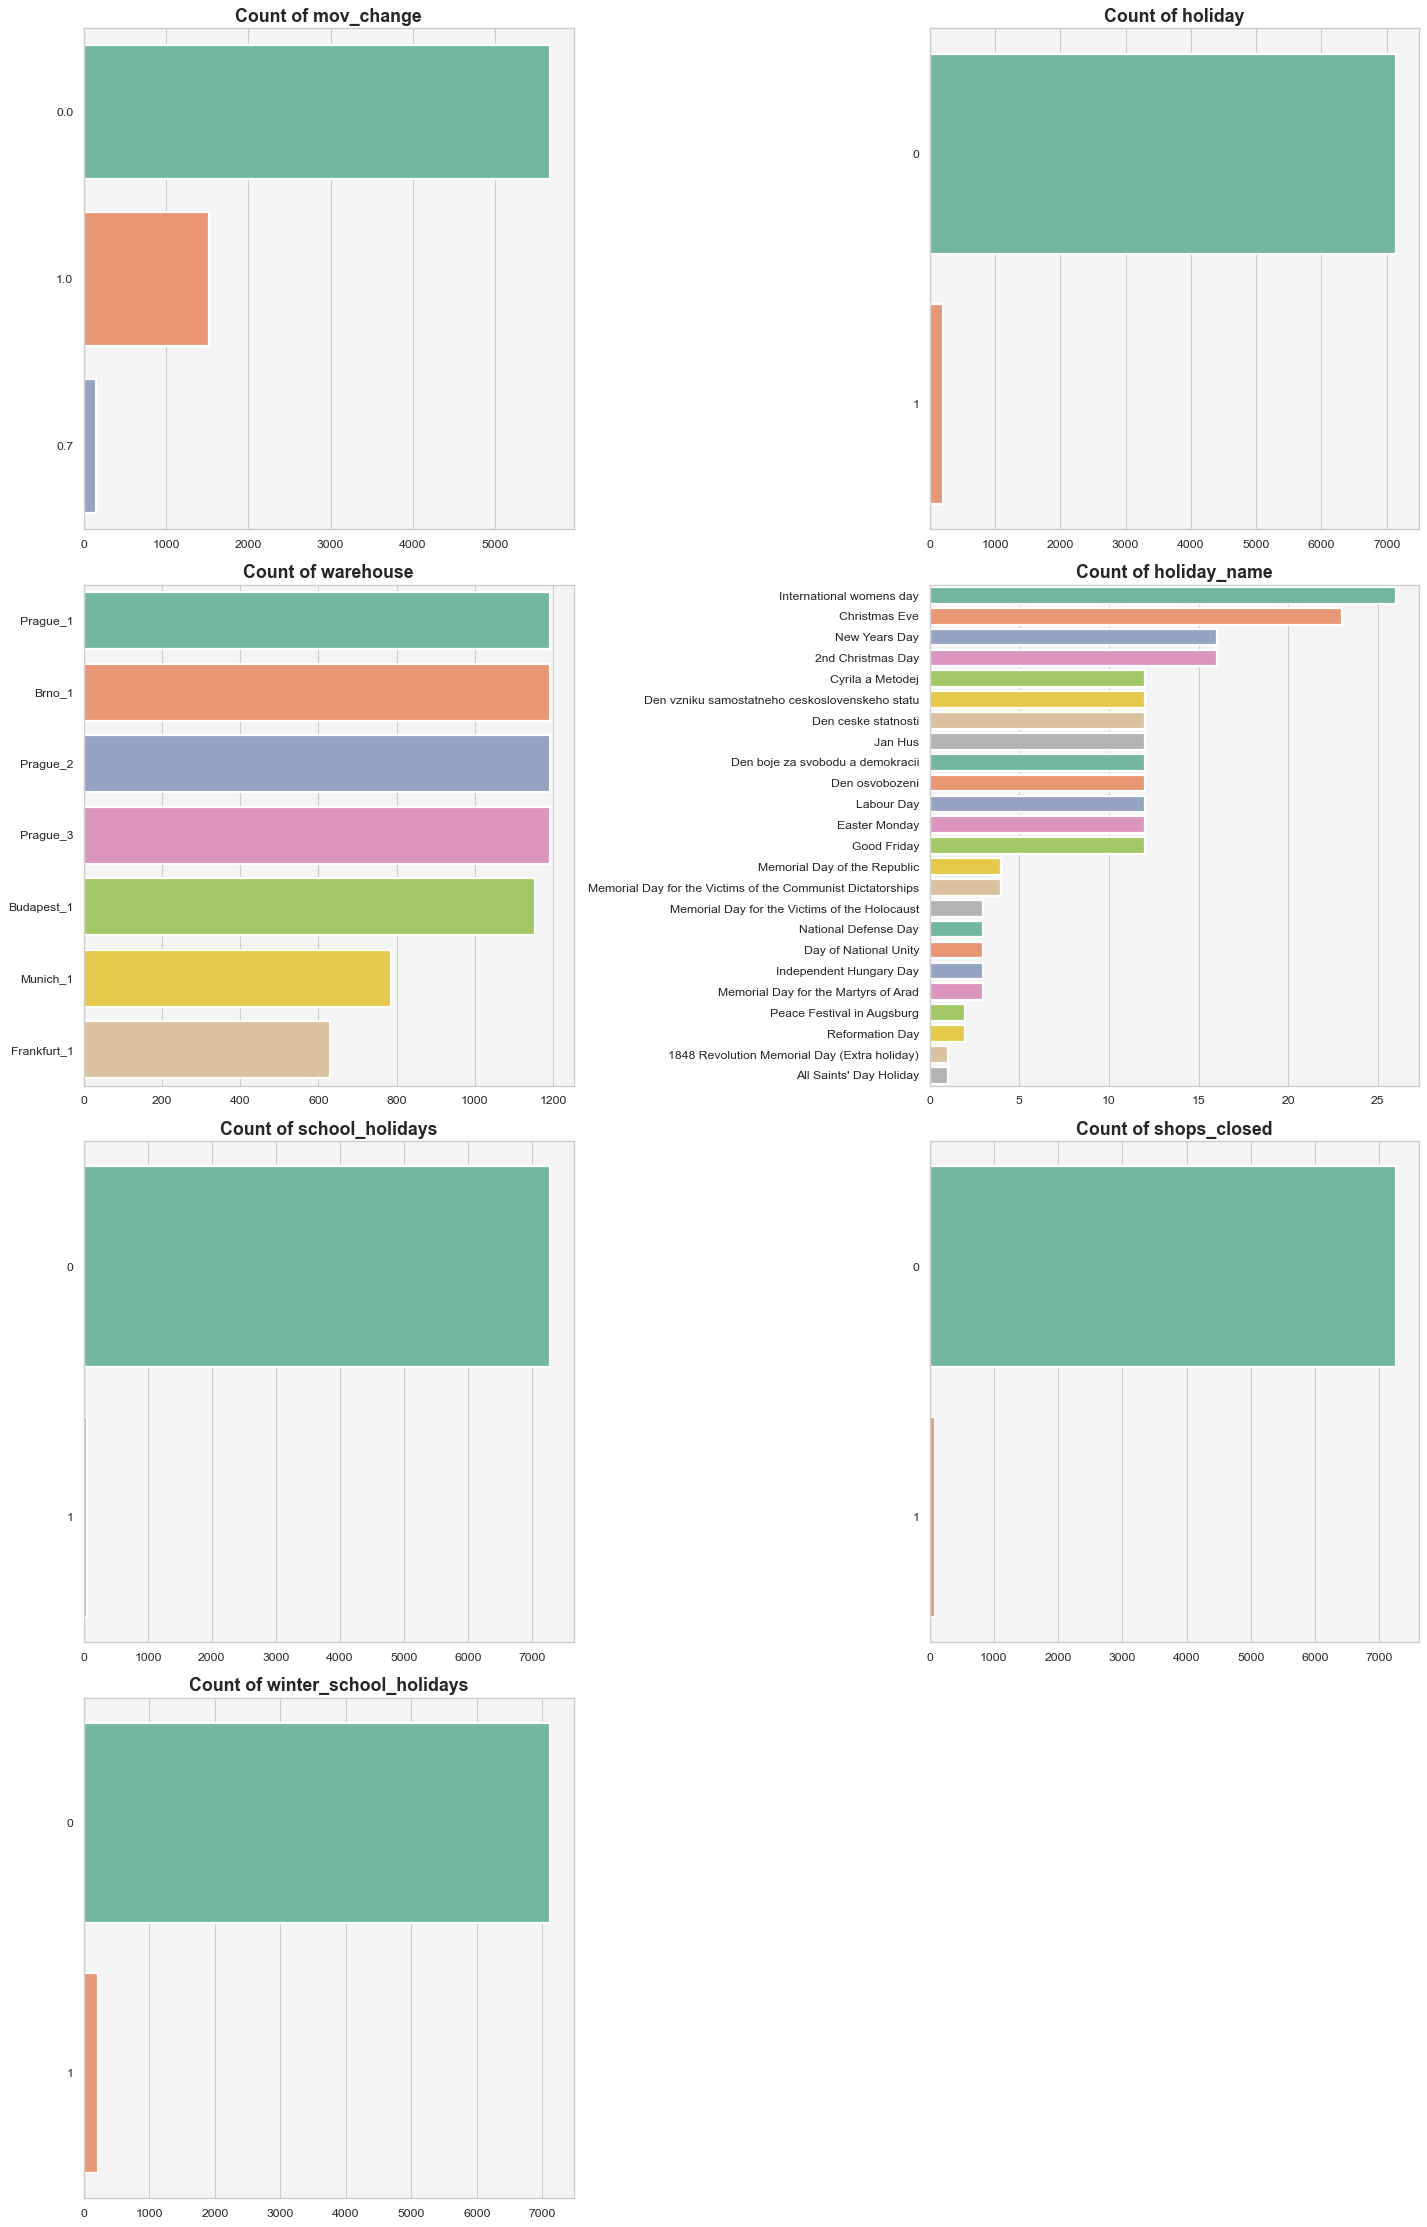

In [11]:
def plot_bar_with_counts(df):
    background_color = '#f4f4f4'
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

    # Define columns for bar plots
    bar_columns = ['mov_change', 'holiday', 'warehouse', 'holiday_name', 'school_holidays', 'shops_closed','winter_school_holidays']

    num_plots = len(bar_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout

    # Increase the size of the figure
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 7 * num_rows), dpi=80)
    axs = axs.flatten()

    for i, col in enumerate(bar_columns):
        p = sns.countplot(y=col, data=df, palette='Set2', edgecolor='white', linewidth=2, ax=axs[i], order=df[col].value_counts().index)
        p.set_title(f'Count of {col}', fontsize=16, weight='bold')  # Increase title font size
        p.set_xlabel('')
        p.set_ylabel('')

        # Add counts inside bars
        #for container in p.containers:
        #    p.bar_label(container, label_type='center', color="black", fontsize=12, weight='bold', padding=6,
        #                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 1, "alpha": 0.8})

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

plot_bar_with_counts(df)


## Lets Have a look at the Scatter Plot


* This function plot_scatter_subplots(df) is used to generate a set of scatter plots and visualize the relationships between selected columns
* The function is designed to visually explore relationships between various numerical columns  for plotting the scatter plot across different categorical values which is used to give color.
* Then this function is useful for quickly visualizing multiple relationships  among columns and  helps to identify the potential correlations or patterns between variables across different categories.
* Then the background color is defined for the plot and set the whitegrid for the plot.
* Then a list of the columns is defined to create the scatter plot
* Then define the categorical columns
* Then the target_column is defined which represents the order column.
* Then the num_plots = len(scatter_columns) is defined which is used to determine the number of scatter plots to be generated based on the length of scatter_columns.
* Then Calculates the number of rows and defines the columns needed for subplots
* Then create sthe figure and generates the subplots
* The enumerate() is used to iterate through each column
* Then set the title, x-axis and y-axis labels and generates the subplots
* Then adjust the subplot parameters to give specified padding.
* Then Displays the finalized scatter plot figure.

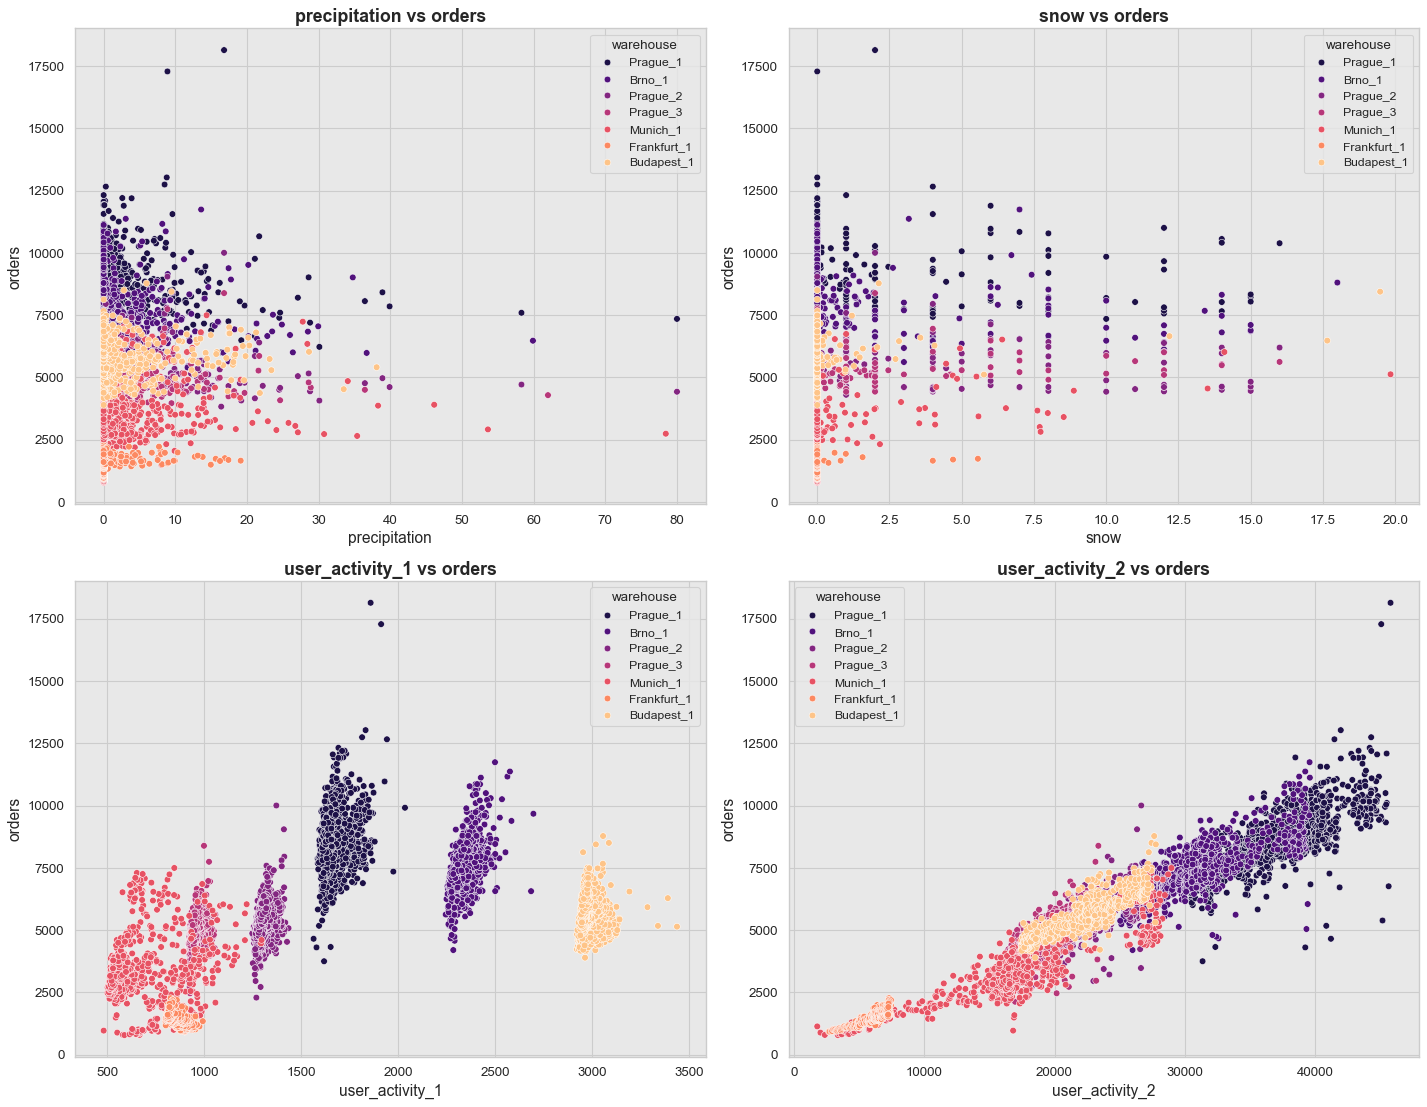

In [12]:
def plot_scatter_subplots(df):
    background_color = '#e8e8e8'
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

    # Define columns and their corresponding categorical values for color differentiation
    scatter_columns = ['precipitation', 'snow', 'user_activity_1', 'user_activity_2']
    categorical_column = 'warehouse'  # Choose a column with very few unique values for color differentiation

    num_plots = len(scatter_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout

    # Increase the size of the figure
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 7 * num_rows), dpi=80)
    axs = axs.flatten()

    target_column = 'orders'  # Assuming 'orders' is the target column to compare with

    for i, col in enumerate(scatter_columns):
        sns.scatterplot(data=df, x=col, y=target_column, hue=categorical_column, ax=axs[i], palette='magma')
        axs[i].set_title(f'{col} vs {target_column}', fontsize=16, weight='bold')  # Increase title font size
        axs[i].set_ylabel(target_column, fontsize=14)  # Increase ylabel font size
        axs[i].set_xlabel(col, fontsize=14)  # Increase xlabel font size
        axs[i].tick_params(axis='both', which='major', labelsize=12)  # Increase tick label font size

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()
plot_scatter_subplots(df)


## Lets Have a Sneak Peak at the Pie Chart

* This code is used to design to create a set of pie charts within separate boxes for each binary column.
* It quickly inspect the balance or distribution of binary features which is useful to take insights and understanding the imapct and relationship in the analysis.
* Then The list of binary_cols are created that contains the columns that are binary  and containonly two unique values such as 0 and 1
* `plot_pie_chart_box` is a function that is used to plot  pie charts for a specified column.
* Then the `set2` color pelette is defined and set the title, x-axis and y-axis label
* Then in oreder to creates the plots the number of rows and columns are defined and creates the figure and array based on num_rows and num_cols
* Then `axs = axs.flatten()` is used to reshape the array of subplots into a 1-dimensional array for easy iteration to takes place.
* Then removes the excess subplots that were not used in the iteration to clean up the layout of the plot.
* Then adjust the parameters and shows the plot.


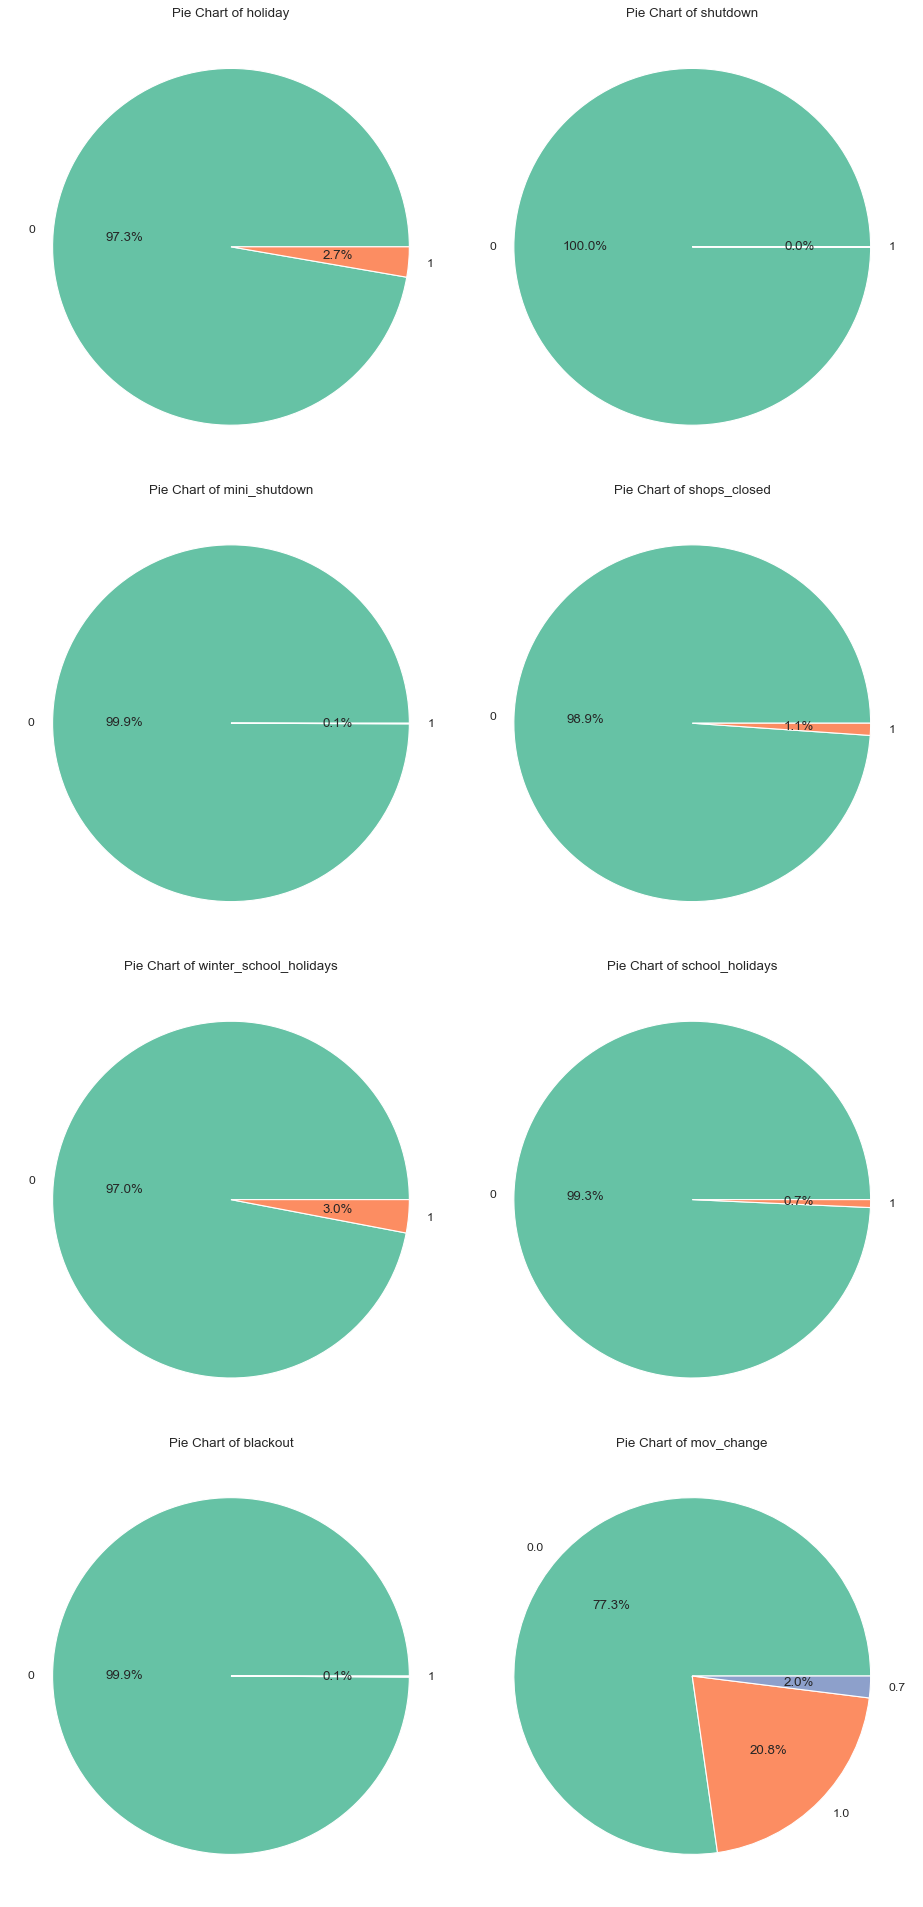

In [13]:
# Define the columns
binary_cols = [
    'holiday', 'shutdown', 'mini_shutdown', 'shops_closed',
    'winter_school_holidays', 'school_holidays', 'blackout', 'mov_change'
]

# Plotting function for pie chart in boxes
def plot_pie_chart_box(ax, col, data):
    colors = sns.color_palette("Set2")
    data[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, colors=colors)
    ax.set_ylabel('')
    ax.set_title(f'Pie Chart of {col}')
    ax.set_aspect('equal')  # Equal aspect ratio ensures pie chart is circular

# Create a subplot for each binary column as individual boxes
num_plots = len(binary_cols)
num_rows = (num_plots + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), dpi=80)
axs = axs.flatten()

for i, col in enumerate(binary_cols):
    plot_pie_chart_box(axs[i], col, df)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [14]:
store_orders = pd.read_csv(train_path,parse_dates=['date'])
#store_orders = store_orders.set_index('date').to_period('D')
store_orders = store_orders.set_index(['warehouse'], append=True)
store_orders

,,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
,warehouse,,,,,,,,,,,,,,,,,
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12


In [15]:
store_orders.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7340 entries, (0, 'Prague_1') to (7339, 'Budapest_1')
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    7340 non-null   datetime64[ns]
 1   orders                  7340 non-null   float64       
 2   holiday_name            218 non-null    object        
 3   holiday                 7340 non-null   int64         
 4   shutdown                7340 non-null   int64         
 5   mini_shutdown           7340 non-null   int64         
 6   shops_closed            7340 non-null   int64         
 7   winter_school_holidays  7340 non-null   int64         
 8   school_holidays         7340 non-null   int64         
 9   blackout                7340 non-null   int64         
 10  mov_change              7340 non-null   float64       
 11  frankfurt_shutdown      7340 non-null   int64         
 12  precipitation     

In [16]:
average_orders = store_orders.groupby('warehouse').mean()['orders']
average_orders

warehouse
Brno_1         7274.532272
Budapest_1     5555.864818
Frankfurt_1    1499.068362
Munich_1       3396.092994
Prague_1       8535.336966
Prague_2       5142.093043
Prague_3       4705.911148
Name: orders, dtype: float64

## Observe the daily order of each warehouse

In [17]:
store_orders = pd.read_csv(train_path,parse_dates=['date'])
store_orders['warehouse']

0         Prague_1
1         Prague_1
2         Prague_1
3         Prague_1
4         Prague_1
           ...    
7335    Budapest_1
7336    Budapest_1
7337    Budapest_1
7338    Budapest_1
7339    Budapest_1
Name: warehouse, Length: 7340, dtype: object

In [18]:
filtered_df = store_orders[store_orders['warehouse'] == 'Prague_1']
filtered_df.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [19]:
#bfill stands for "backward fil
filtered_df['rolling_avg'] = filtered_df['orders'].rolling(window=2, min_periods=2).mean().fillna(method='bfill')
filtered_df['rolling_avg']

C:\Users\joseph\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0        6739.5
1        6739.5
2        6807.0
3        6790.0
4        6730.0
         ...   
1188    10058.0
1189     9788.0
1190     9669.0
1191     9842.0
1192    10986.5
Name: rolling_avg, Length: 1193, dtype: float64

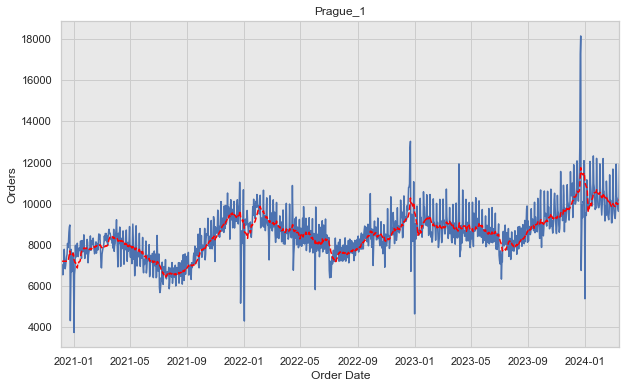

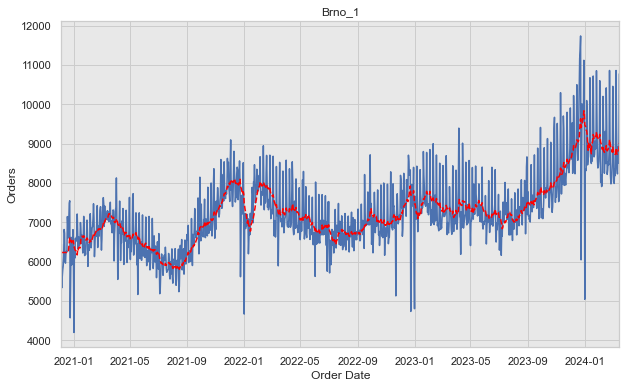

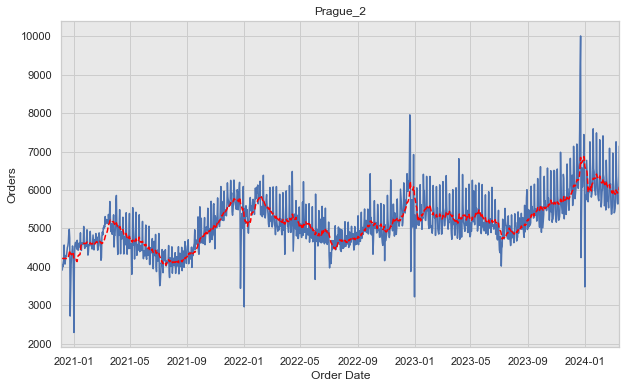

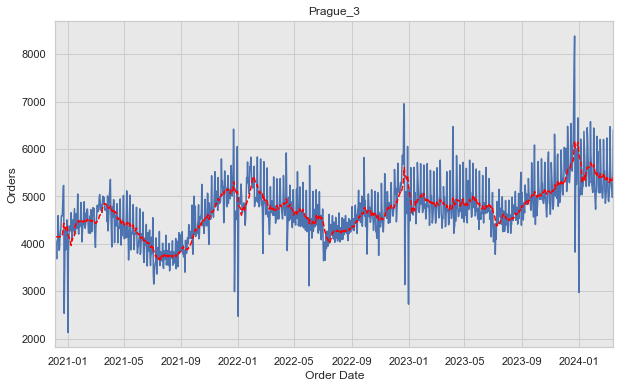

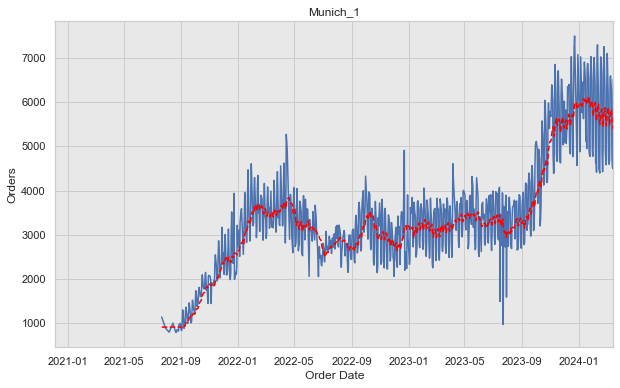

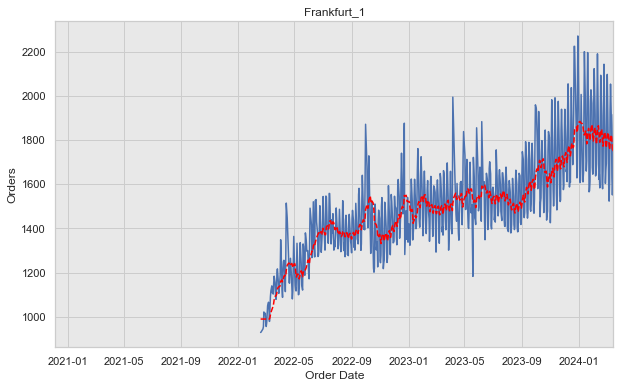

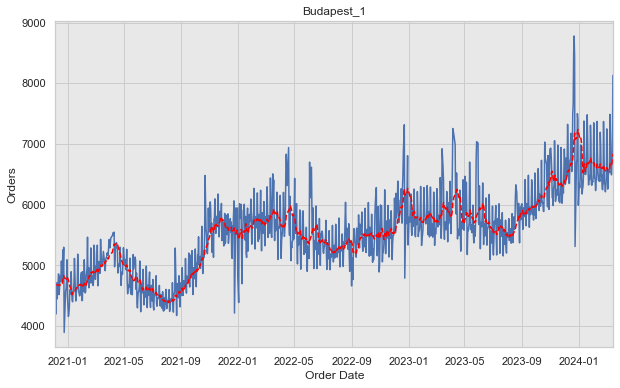

In [20]:
unique_warehouse = df['warehouse'].unique()
min_date = store_orders['date'].min()
max_date = store_orders['date'].max()


for warehouse in unique_warehouse:
    filtered_df = store_orders[store_orders['warehouse'] == warehouse]
    #add rolling moving average
    filtered_df['rolling_avg'] = filtered_df['orders'].rolling(window=15).mean().fillna(method='bfill')
    # Plot the selected orders
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['date'], filtered_df['orders'], marker='') #, linestyle='-')
    plt.plot(filtered_df['date'], filtered_df['rolling_avg'], marker='', linestyle='--', color='red', label=f'Moving Avg: {warehouse}')

    plt.xlabel('Order Date')
    plt.ylabel('Orders')
    plt.xlim(min_date, max_date)
    plt.title(warehouse)
    plt.grid(True)
    plt.show()

# Lets Train and Select the Best Model for Rohlik Orders Forecasting

## preprocess the data set 

In [21]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(sub_path)


In [22]:
submission_df

,id,orders
0,Prague_1_2024-03-16,5000
1,Prague_1_2024-03-17,5000
2,Prague_1_2024-03-18,5000
3,Prague_1_2024-03-19,5000
4,Prague_1_2024-03-20,5000
...,...,...
392,Budapest_1_2024-05-11,5000
393,Budapest_1_2024-05-12,5000
394,Budapest_1_2024-05-13,5000
395,Budapest_1_2024-05-14,5000


In [23]:

# Feature engineering function
def add_date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    
    # Apply cyclic encoding
    #df['day_of_week_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    #df['day_of_week_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    #df.drop('dayofweek', axis=1, inplace=True)
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    
    df.drop('date', axis=1, inplace=True)
    
    
    return df

# Apply feature engineering to both train and test data
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)
 
# Drop unnecessary columns from training data only 
#joseph drop column: id
cols_to_drop = ['id','blackout','shutdown', 'mini_shutdown', 'mov_change', 'frankfurt_shutdown', 'precipitation', 'snow', 'user_activity_1', 'user_activity_2']
train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)
# Encode categorical columns
#label_encoders = {}
#for col in ['warehouse', 'holiday_name']:
#    label_encoders[col] = LabelEncoder()
#    train_df[col] = label_encoders[col].fit_transform(train_df[col])
#    test_df[col] = label_encoders[col].transform(test_df[col])
    
train_df = pd.get_dummies(train_df, columns = ['warehouse','holiday_name'])
train_df = pd.get_dummies(train_df, columns = ['dayofweek'])
test_df = pd.get_dummies(test_df, columns = ['warehouse','holiday_name'])
test_df = pd.get_dummies(test_df, columns = ['dayofweek'])
    

# Ensure all features are numeric
def ensure_numeric(df):
    for col in df.columns:
      
        if df[col].dtype == 'object':
            print(f'trainsform ==> {col}')
            df[col] = LabelEncoder().fit_transform(df[col])
    return df

train_df = ensure_numeric(train_df)
test_df = ensure_numeric(test_df)

# Prepare data for training
X = train_df.drop('orders', axis=1)
y = train_df['orders']





In [24]:
train_df

,orders,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,is_weekend,warehouse_Brno_1,...,holiday_name_New Years Day,holiday_name_Peace Festival in Augsburg,holiday_name_Reformation Day,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,6895.0,0,0,0,0,2020,12,5,1,0,...,0,0,0,0,0,0,0,0,1,0
1,6584.0,0,0,0,0,2020,12,6,1,0,...,0,0,0,0,0,0,0,0,0,1
2,7030.0,0,0,0,0,2020,12,7,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6550.0,0,0,0,0,2020,12,8,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6910.0,0,0,0,0,2020,12,9,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,0,0,0,0,2024,3,10,1,0,...,0,0,0,0,0,0,0,0,0,1
7336,6492.0,0,0,0,0,2024,3,11,0,0,...,0,0,0,1,0,0,0,0,0,0
7337,6661.0,0,0,0,0,2024,3,12,0,0,...,0,0,0,0,1,0,0,0,0,0
7338,6843.0,0,0,0,0,2024,3,13,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
#train_df.to_csv('train_onehot.csv', index=False)
#test_df.to_csv('test_onehot.csv', index=False)

In [26]:
test_df

,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,is_weekend,warehouse_Brno_1,warehouse_Budapest_1,...,holiday_name_Good Friday,holiday_name_Labour Day,holiday_name_Memorial Day for the Victims of the Holocaust,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,0,0,0,2024,3,16,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,2024,3,17,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,2024,3,18,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,2024,3,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2024,3,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,2024,5,11,1,0,1,...,0,0,0,0,0,0,0,0,1,0
393,0,0,0,0,2024,5,12,1,0,1,...,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,2024,5,13,0,0,1,...,0,0,0,1,0,0,0,0,0,0
395,0,0,0,0,2024,5,14,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [27]:
print(X.shape)
print(X.columns)

(7340, 46)
Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_1848 Revolution Memorial Day (Extra holiday)',
       'holiday_name_2nd Christmas Day',
       'holiday_name_All Saints' Day Holiday', 'holiday_name_Christmas Eve',
       'holiday_name_Cyrila a Metodej', 'holiday_name_Day of National Unity',
       'holiday_name_Den boje za svobodu a demokracii',
       'holiday_name_Den ceske statnosti', 'holiday_name_Den osvobozeni',
       'holiday_name_Den vzniku samostatneho ceskoslovenskeho statu',
       'holiday_name_Easter Monday', 'holiday_name_Good Friday',
       'holiday_name_Independent Hungary Day',
       'holiday_name_International womens day', 'holiday_name_Jan Hus',
       'holiday_name_Labour Day',
       'holi

In [28]:
X.head()

,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,is_weekend,warehouse_Brno_1,warehouse_Budapest_1,...,holiday_name_New Years Day,holiday_name_Peace Festival in Augsburg,holiday_name_Reformation Day,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,0,0,0,2020,12,5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,2020,12,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,2020,12,7,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,2020,12,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2020,12,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
X.head(-10)

,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,is_weekend,warehouse_Brno_1,warehouse_Budapest_1,...,holiday_name_New Years Day,holiday_name_Peace Festival in Augsburg,holiday_name_Reformation Day,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,0,0,0,2020,12,5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,2020,12,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,2020,12,7,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,2020,12,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2020,12,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,0,0,0,0,2024,2,29,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7326,0,0,0,0,2024,3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7327,0,0,0,0,2024,3,2,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7328,0,0,0,0,2024,3,3,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
print(y.shape)


(7340,)


## select some features

In [31]:
# Feature selection on training data
selector = SelectKBest(f_regression, k='all')  # Adjust 'k' to select the number of features you want k= 'all'
selector.fit(X, y)
selected_features = X.columns[selector.get_support()] #selector.get_support(): [ True, False, False,True,...]

X = X[selected_features]

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
print(X.shape)
print(X.columns)

(7340, 46)
Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_1848 Revolution Memorial Day (Extra holiday)',
       'holiday_name_2nd Christmas Day',
       'holiday_name_All Saints' Day Holiday', 'holiday_name_Christmas Eve',
       'holiday_name_Cyrila a Metodej', 'holiday_name_Day of National Unity',
       'holiday_name_Den boje za svobodu a demokracii',
       'holiday_name_Den ceske statnosti', 'holiday_name_Den osvobozeni',
       'holiday_name_Den vzniku samostatneho ceskoslovenskeho statu',
       'holiday_name_Easter Monday', 'holiday_name_Good Friday',
       'holiday_name_Independent Hungary Day',
       'holiday_name_International womens day', 'holiday_name_Jan Hus',
       'holiday_name_Labour Day',
       'holi

## train different kinds of  regrssion models and choose the best one 

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Define the models and their hyperparameters
models = {

    
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {None}
    },
    
    "CatBoost": {
        "model": CatBoostRegressor(),
        "params": {
            'iterations': [100, 200, 300],
            'depth': [6, 8, 10],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    "LightGBM": {
        "model": LGBMRegressor(),
        "params": {
            'n_estimators': [100, 200, 300],
            'num_leaves': [31, 50, 70],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    

    
    "GBR": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    }
    
    
    
}

best_model = None
best_mape = float("inf")
best_r2 = -float("inf")
best_model_name = ""

for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    
    if model_name=='LinearRegression':
        best_estimator=model_info["model"]
        best_estimator.fit(X_train, y_train)
    else:       

        grid_search = GridSearchCV(estimator=model_info["model"], param_grid=model_info["params"], cv=3, scoring='neg_mean_absolute_percentage_error', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_

        # Get best parameters
        best_params = grid_search.best_params_
        print(f"Best parameters for {model_name}: {best_params}")

    # Evaluate on validation set
    y_pred = best_estimator.predict(X_valid)
    mape = mean_absolute_percentage_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    print(f"{model_name} Validation MAPE: {mape}, R^2 Score: {r2}")

    if mape < best_mape:
        best_mape = mape
        best_r2 = r2
        best_model = best_estimator
        best_model_name = model_name

print(f"Best model: {best_model_name}")
print(f"Best validation MAPE: {best_mape}")
print(f"Corresponding R^2 Score: {best_r2}")


Training LinearRegression...
LinearRegression Validation MAPE: 0.09730615813454502, R^2 Score: 0.8904316117232772
Training CatBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 1856.2577594	total: 131ms	remaining: 39.1s
1:	learn: 1552.5864718	total: 135ms	remaining: 20.1s
2:	learn: 1314.7139665	total: 138ms	remaining: 13.7s
3:	learn: 1120.3328256	total: 141ms	remaining: 10.5s
4:	learn: 968.6909666	total: 145ms	remaining: 8.54s
5:	learn: 841.3877157	total: 148ms	remaining: 7.27s
6:	learn: 751.1230046	total: 152ms	remaining: 6.36s
7:	learn: 674.9066275	total: 155ms	remaining: 5.67s
8:	learn: 616.7429865	total: 159ms	remaining: 5.14s
9:	learn: 571.5206175	total: 162ms	remaining: 4.7s
10:	learn: 538.8008800	total: 166ms	remaining: 4.35s
11:	learn: 509.9665614	total: 169ms	remaining: 4.06s
12:	learn: 489.1850779	total: 173ms	remaining: 3.81s
13:	learn: 469.9010131	total: 176ms	remaining: 3.6s
14:	learn: 457.4711005	total: 180ms	remaining: 3.41s
15:	learn: 439.61

157:	learn: 180.1647814	total: 644ms	remaining: 579ms
158:	learn: 179.3681598	total: 647ms	remaining: 574ms
159:	learn: 178.7167848	total: 651ms	remaining: 569ms
160:	learn: 178.7033092	total: 654ms	remaining: 565ms
161:	learn: 178.0768135	total: 657ms	remaining: 560ms
162:	learn: 177.3251844	total: 661ms	remaining: 555ms
163:	learn: 176.8114741	total: 664ms	remaining: 551ms
164:	learn: 176.8062910	total: 667ms	remaining: 546ms
165:	learn: 176.3097539	total: 671ms	remaining: 541ms
166:	learn: 176.2718931	total: 674ms	remaining: 537ms
167:	learn: 175.7434557	total: 677ms	remaining: 532ms
168:	learn: 175.7004757	total: 681ms	remaining: 528ms
169:	learn: 175.6811627	total: 684ms	remaining: 523ms
170:	learn: 175.5925768	total: 688ms	remaining: 519ms
171:	learn: 174.9221161	total: 691ms	remaining: 514ms
172:	learn: 174.9175801	total: 694ms	remaining: 510ms
173:	learn: 174.0207675	total: 698ms	remaining: 505ms
174:	learn: 173.8109509	total: 701ms	remaining: 501ms
175:	learn: 173.1066297	tota

Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 50}
LightGBM Validation MAPE: 0.0387707367390062, R^2 Score: 0.9809867078388479
Training GBR...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for GBR: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
GBR Validation MAPE: 0.03773752021811954, R^2 Score: 0.9786048492985409
Best model: CatBoost
Best validation MAPE: 0.03542849255860675
Corresponding R^2 Score: 0.9840634651794649


In [35]:
selected_features

Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_1848 Revolution Memorial Day (Extra holiday)',
       'holiday_name_2nd Christmas Day',
       'holiday_name_All Saints' Day Holiday', 'holiday_name_Christmas Eve',
       'holiday_name_Cyrila a Metodej', 'holiday_name_Day of National Unity',
       'holiday_name_Den boje za svobodu a demokracii',
       'holiday_name_Den ceske statnosti', 'holiday_name_Den osvobozeni',
       'holiday_name_Den vzniku samostatneho ceskoslovenskeho statu',
       'holiday_name_Easter Monday', 'holiday_name_Good Friday',
       'holiday_name_Independent Hungary Day',
       'holiday_name_International womens day', 'holiday_name_Jan Hus',
       'holiday_name_Labour Day',
       'holiday_name_Me

In [36]:
# After training and evaluating the models, find the best model and its performance
print(f"Best model: {best_model_name}")
print(f"Best validation MAPE: {best_mape}")
print(f"Corresponding R^2 Score: {best_r2}")

Best model: CatBoost
Best validation MAPE: 0.03542849255860675
Corresponding R^2 Score: 0.9840634651794649


## predict the test data

In [37]:

# Ensure all selected features are present in the test data
missing_cols = set(selected_features) - set(test_df.columns)
for col in missing_cols:
    print(col)
    test_df[col] = 0

test_df_selected = test_df[selected_features]

# Predict on test set
test_predictions = best_model.predict(test_df_selected)

holiday_name_Den ceske statnosti
holiday_name_Reformation Day
holiday_name_Day of National Unity
holiday_name_All Saints' Day Holiday
holiday_name_2nd Christmas Day
holiday_name_Independent Hungary Day
holiday_name_Cyrila a Metodej
holiday_name_National Defense Day
holiday_name_Peace Festival in Augsburg
holiday_name_Den boje za svobodu a demokracii
holiday_name_Jan Hus
holiday_name_International womens day
holiday_name_Den vzniku samostatneho ceskoslovenskeho statu
holiday_name_Memorial Day of the Republic
holiday_name_Memorial Day for the Victims of the Communist Dictatorships
holiday_name_New Years Day
holiday_name_Memorial Day for the Martyrs of Arad
holiday_name_1848 Revolution Memorial Day (Extra holiday)
holiday_name_Christmas Eve


In [38]:
test_df_selected.columns

Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_1848 Revolution Memorial Day (Extra holiday)',
       'holiday_name_2nd Christmas Day',
       'holiday_name_All Saints' Day Holiday', 'holiday_name_Christmas Eve',
       'holiday_name_Cyrila a Metodej', 'holiday_name_Day of National Unity',
       'holiday_name_Den boje za svobodu a demokracii',
       'holiday_name_Den ceske statnosti', 'holiday_name_Den osvobozeni',
       'holiday_name_Den vzniku samostatneho ceskoslovenskeho statu',
       'holiday_name_Easter Monday', 'holiday_name_Good Friday',
       'holiday_name_Independent Hungary Day',
       'holiday_name_International womens day', 'holiday_name_Jan Hus',
       'holiday_name_Labour Day',
       'holiday_name_Me

In [39]:
len(test_predictions)

397

In [40]:
y_pred = best_model.predict(X_valid)
mape = mean_absolute_percentage_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
print(f"{best_model_name} Validation MAPE: {mape}, R^2 Score: {r2}")

CatBoost Validation MAPE: 0.03542849255860675, R^2 Score: 0.9840634651794649


In [41]:
# Prepare submission file
submission_df['orders'] = test_predictions
if local_run == True:
    submission_df.to_csv("best_model_sample_sol.csv", index=False)
else:
    submission_df.to_csv('/kaggle/working/best_model_sample_sol.csv', index=False)

# retrain the best model with complete training data

In [42]:
best_model.fit(X,y)

0:	learn: 1857.6938984	total: 1.42ms	remaining: 424ms
1:	learn: 1553.4902849	total: 6.2ms	remaining: 924ms
2:	learn: 1317.3226541	total: 10.3ms	remaining: 1.02s
3:	learn: 1116.1556455	total: 13.9ms	remaining: 1.03s
4:	learn: 962.2732865	total: 19ms	remaining: 1.12s
5:	learn: 836.6500532	total: 23.6ms	remaining: 1.15s
6:	learn: 746.7948372	total: 28.1ms	remaining: 1.18s
7:	learn: 672.5905971	total: 32.4ms	remaining: 1.18s
8:	learn: 612.8305487	total: 37.2ms	remaining: 1.2s
9:	learn: 571.0031608	total: 41.3ms	remaining: 1.2s
10:	learn: 534.7279289	total: 45.6ms	remaining: 1.2s
11:	learn: 510.5965476	total: 50.3ms	remaining: 1.21s
12:	learn: 488.1366343	total: 54.8ms	remaining: 1.21s
13:	learn: 468.0280909	total: 58.6ms	remaining: 1.2s
14:	learn: 453.8181267	total: 64.6ms	remaining: 1.23s
15:	learn: 444.2874808	total: 70.6ms	remaining: 1.25s
16:	learn: 431.1841654	total: 74.2ms	remaining: 1.24s
17:	learn: 418.4954104	total: 77.9ms	remaining: 1.22s
18:	learn: 409.1804637	total: 81.5ms	rema

155:	learn: 182.5368587	total: 620ms	remaining: 572ms
156:	learn: 182.1104882	total: 623ms	remaining: 568ms
157:	learn: 182.0364745	total: 627ms	remaining: 564ms
158:	learn: 181.4747501	total: 631ms	remaining: 559ms
159:	learn: 180.7051359	total: 634ms	remaining: 555ms
160:	learn: 179.9763464	total: 638ms	remaining: 551ms
161:	learn: 179.4902711	total: 643ms	remaining: 547ms
162:	learn: 179.2157490	total: 646ms	remaining: 543ms
163:	learn: 178.6029797	total: 650ms	remaining: 539ms
164:	learn: 178.1455882	total: 654ms	remaining: 535ms
165:	learn: 177.7002642	total: 657ms	remaining: 531ms
166:	learn: 176.8382486	total: 661ms	remaining: 526ms
167:	learn: 176.8290650	total: 665ms	remaining: 522ms
168:	learn: 176.7953699	total: 670ms	remaining: 519ms
169:	learn: 176.6541680	total: 674ms	remaining: 515ms
170:	learn: 176.0877640	total: 677ms	remaining: 511ms
171:	learn: 175.5022366	total: 682ms	remaining: 507ms
172:	learn: 174.9139923	total: 686ms	remaining: 503ms
173:	learn: 174.5075903	tota

In [43]:
y_pred = best_model.predict(X_valid)
mape = mean_absolute_percentage_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
print(f"{best_model_name} Validation MAPE: {mape}, R^2 Score: {r2}")

CatBoost Validation MAPE: 0.020193344276855655, R^2 Score: 0.9959871152332892


In [44]:
test_df_selected.to_csv("test_df_selected.csv", index=False)

# oputut a submission file

In [45]:
# Prepare submission file
test_predictions = best_model.predict(test_df_selected)
submission_df['orders'] = test_predictions
if local_run == True:
    submission_df.to_csv("best_model_sample_sol_v3.csv", index=False)
else:
    submission_df.to_csv('/kaggle/working/best_model_sample_sol.csv', index=False)

In [46]:
test_df.columns

Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_Den osvobozeni', 'holiday_name_Easter Monday',
       'holiday_name_Good Friday', 'holiday_name_Labour Day',
       'holiday_name_Memorial Day for the Victims of the Holocaust',
       'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'holiday_name_Den ceske statnosti', 'holiday_name_Reformation Day',
       'holiday_name_Day of National Unity',
       'holiday_name_All Saints' Day Holiday',
       'holiday_name_2nd Christmas Day',
       'holiday_name_Independent Hungary Day', 'holiday_name_Cyrila a Metodej',
       'holiday_name_National Defense Day',
       'holiday_name_Peace Festival in Augsburg',
     

In [47]:
test_df_selected.columns

Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'year', 'month', 'day', 'is_weekend', 'warehouse_Brno_1',
       'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1',
       'warehouse_Prague_1', 'warehouse_Prague_2', 'warehouse_Prague_3',
       'holiday_name_1848 Revolution Memorial Day (Extra holiday)',
       'holiday_name_2nd Christmas Day',
       'holiday_name_All Saints' Day Holiday', 'holiday_name_Christmas Eve',
       'holiday_name_Cyrila a Metodej', 'holiday_name_Day of National Unity',
       'holiday_name_Den boje za svobodu a demokracii',
       'holiday_name_Den ceske statnosti', 'holiday_name_Den osvobozeni',
       'holiday_name_Den vzniku samostatneho ceskoslovenskeho statu',
       'holiday_name_Easter Monday', 'holiday_name_Good Friday',
       'holiday_name_Independent Hungary Day',
       'holiday_name_International womens day', 'holiday_name_Jan Hus',
       'holiday_name_Labour Day',
       'holiday_name_Me

# Conclusion


* This is the Rohlik Order Forecasting Challenge.
* The aim is that to Forecast the Rohlik Orders By applying various ML Models and choose the best out of it which gives the best performance.
* Firstly in order to explore the Dataset the overview of data is taken.
* Then in order to take insights about the Datasetdiffrent types of plots are being plotted and took deep insights about the Dataset.
* Then apply Diffrent ML models such as CatBoost, XGBoost and LightGBM with Hyperparameter Tuning and select the Best Model out of it.
* The Best Model is the Cat Boost which Gives 0.035 MAPE and 0.98 r2_score